In [3]:
!pip install qiskit

[0.70710678 0.         0.70710678]


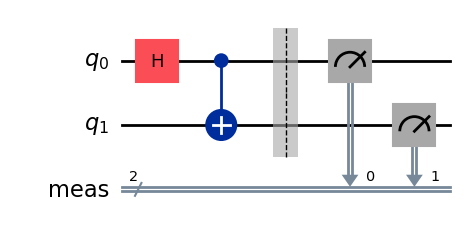

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit.library import UnitaryGate
import numpy as np
import math

rotation_vector = np.array([1,0,1])
rotation_vector = rotation_vector / np.sqrt((rotation_vector.dot(rotation_vector)))
print(rotation_vector)
magnitude = math.pi # radians
rotation_vector = rotation_vector * magnitude
 
# matrix = [[1, 0, 0, 0],
#           [0, 1, 0, 0],
#           [0, 0, 0, 1],
#           [0, 0, 1, 0]]

# gate = UnitaryGate(matrix)
 
circuit = QuantumCircuit(2) # ,2

# circuit.h(0)

# circuit.append(gate, [0, 1])

circuit.rv(*rotation_vector,0) # hadamard

circuit.cx(0,1)

circuit.measure_all()
# circuit.measure(0,0)

circuit.draw("mpl")



In [21]:
from qiskit_aer import AerSimulator

# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

{'11': 489, '00': 535}
{'11': 493, '00': 531}
{'11': 489, '00': 535}
{'11': 509, '00': 515}
{'11': 517, '00': 507}
{'11': 535, '00': 489}
{'11': 518, '00': 506}
{'11': 521, '00': 503}
{'11': 527, '00': 497}
{'00': 520, '11': 504}
{'00': 493, '11': 531}
{'11': 491, '00': 533}
{'11': 507, '00': 517}
{'00': 515, '11': 509}
{'00': 530, '11': 494}
{'11': 514, '00': 510}
{'00': 502, '11': 522}
{'11': 527, '00': 497}
{'00': 502, '11': 522}
{'11': 519, '00': 505}
{'11': 469, '00': 555}
{'00': 523, '11': 501}
{'11': 522, '00': 502}
{'11': 494, '00': 530}
{'11': 525, '00': 499}
{'00': 511, '11': 513}
{'11': 512, '00': 512}
{'11': 508, '00': 516}
{'00': 523, '11': 501}
{'00': 529, '11': 495}
{'00': 486, '11': 538}
{'11': 500, '00': 524}
{'00': 499, '11': 525}
{'11': 517, '00': 507}
{'11': 504, '00': 520}
{'00': 494, '11': 530}
{'00': 494, '11': 530}
{'00': 491, '11': 533}
{'00': 506, '11': 518}
{'00': 503, '11': 521}
{'11': 516, '00': 508}
{'11': 517, '00': 507}
{'11': 492, '00': 532}
{'00': 514,

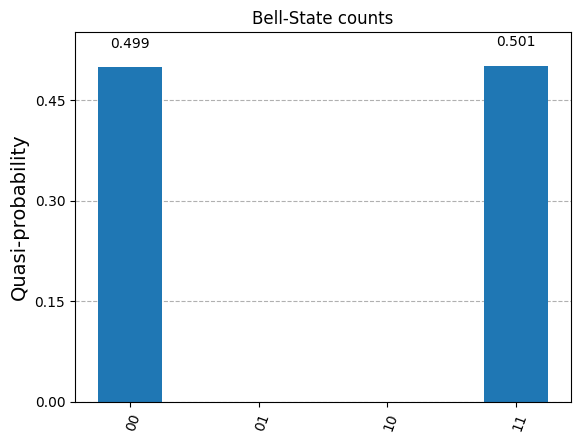

In [22]:
# Run and get counts
c00 = 0
c10 = 0
c01 = 0
c11 = 0
n=100
for _ in range(n):
    result = simulator.run(circuit).result()
    counts = result.get_counts(circuit)
    print(counts)
    try:
        c00+=counts['00']
        
    except KeyError: pass
    try:
        c10+=counts ['10']
        
    except KeyError: pass
    try:
        c01+=counts['01']
        
    except KeyError: pass
    try:
        c11+=counts ['11']
        
    except KeyError: pass

counts = {"00":c00/n, "01":c01/n, "10":c10/n, "11":c11/n}
print(counts)
plot_histogram(counts, title='Bell-State counts')